# About

In this programming assignment you will train a classifier to identify type of a particle. There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise. 

Different particle types remain different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system.

![pid](pic/pid.jpg)

You task is to identify a particle type using the responses in the detector systems. 

# Attention

Data files you should download from https://github.com/hse-aml/hadron-collider-machine-learning/releases/tag/Week_2

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import utils

In [6]:
import import_ipynb
import utils

# Download data

Download data used to train classifiers.

### Read training file

In [7]:
data = pd.read_csv('C://Users/user/Desktop/AML/course7/week2/training.csv')

In [8]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


### List of columns in the samples

Here, **Spd** stands for Scintillating Pad Detector, **Prs** - Preshower, **Ecal** - electromagnetic calorimeter, **Hcal** - hadronic calorimeter, **Brem** denotes traces of the particles that were deflected by detector.

- ID - id value for tracks (presents only in the test file for the submitting purposes)
- Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
- FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
- FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
- FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
- FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
- FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
- FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
- FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
- FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- SpdE - energy deposit associated to the track in the Spd
- PrsE - energy deposit associated to the track in the Prs
- EcalE - energy deposit associated to the track in the Hcal
- HcalE - energy deposit associated to the track in the Hcal
- PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
- BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
- TrackP - particle momentum
- TrackPt - particle transverse momentum
- TrackNDoFSubdetector1  - number of degrees of freedom for track fit using hits in the tracking sub-detector1
- TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
- TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
- TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the  tracking sub-detector2
- TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
- TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
- TrackDistanceToZ - distance between track and z-axis (beam axis)
- Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter 
- Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
- EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
- EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
- EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
- HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
- HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
- RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- RICH_DLLbeBCK  - delta log-likelihood for a particle candidate to be background using information from RICH
- RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
- RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
- RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
- RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
- MuonFlag - muon flag (is this track muon) which is determined from muon stations
- MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
- MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
- MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
- DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

Delta log-likelihood in the features descriptions means the difference between log-likelihood for the mass hypothesis that a given track is left by some particle (for example, electron) and log-likelihood for the mass hypothesis that a given track is left by a pion (so, DLLpion = 0 and thus we don't have these columns). This is done since most tracks (~80%) are left by pions and in practice we actually need to discriminate other particles from pions. In other words, the null hypothesis is that particle is a pion.

### Look at the labels set

The training data contains six classes. Each class corresponds to a particle type. Your task is to predict type of a particle.

In [9]:
set(data.Label)

{'Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'}

Convert the particle types into class numbers.

In [10]:
data['Class'] = utils.get_class_ids(data.Label.values)
set(data.Class)

{0, 1, 2, 3, 4, 5}

### Define training features

The following set of features describe particle responses in the detector systems:

![features](pic/features.jpeg)

Also there are several combined features. The full list is following.

In [11]:
features = list(set(data.columns) - {'Label', 'Class'})
features

['TrackP',
 'FlagPrs',
 'DLLkaon',
 'RICHpFlagPion',
 'MuonLLbeBCK',
 'MuonLLbeMuon',
 'TrackNDoF',
 'FlagHcal',
 'DLLproton',
 'TrackDistanceToZ',
 'HcalDLLbeMuon',
 'TrackNDoFSubdetector2',
 'MuonLooseFlag',
 'RICH_DLLbeElectron',
 'FlagRICH1',
 'Calo3dFitQuality',
 'RICH_DLLbeProton',
 'EcalE',
 'RICHpFlagKaon',
 'TrackPt',
 'SpdE',
 'RICHpFlagMuon',
 'EcalShowerLongitudinalParameter',
 'RICH_DLLbeKaon',
 'HcalE',
 'RICHpFlagProton',
 'FlagMuon',
 'FlagEcal',
 'EcalDLLbeMuon',
 'RICHpFlagElectron',
 'TrackQualitySubdetector2',
 'PrsE',
 'HcalDLLbeElectron',
 'MuonFlag',
 'RICH_DLLbeBCK',
 'EcalDLLbeElectron',
 'GhostProbability',
 'Calo2dFitQuality',
 'TrackNDoFSubdetector1',
 'TrackQualitySubdetector1',
 'DLLmuon',
 'TrackQualityPerNDoF',
 'FlagBrem',
 'BremDLLbeElectron',
 'FlagSpd',
 'DLLelectron',
 'FlagRICH2',
 'PrsDLLbeElectron',
 'RICH_DLLbeMuon']

### Divide training data into 2 parts

In [12]:
training_data, validation_data = train_test_split(data, random_state=11, train_size=0.90, test_size=0.10)

In [13]:
len(training_data), len(validation_data)

(1080000, 120000)

In [14]:
training_data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,Class
968874,12192.330089,17.0,-0.170024,0.0,1.0,0.0,-1.831868,-0.996012,1.0,5.017775e-01,...,1.0,-19.783108,-6.720408,1914.190913,1.0,1.0,1.967353e-06,-2.804208,-25.041909,1
912808,40379.488299,7.0,-999.000000,0.0,0.0,-999.0,-999.000000,-0.792678,1.0,-9.990000e+02,...,1.0,-14.755493,-2.304893,-999.000000,0.0,1.0,-9.990000e+02,-0.967993,-18.450494,4
30045,5294.729989,12.0,-0.381504,1.0,1.0,3.2,-0.589851,-2.054347,1.0,-2.142670e+00,...,1.0,13.137106,-7.920494,2567.385966,1.0,1.0,7.569901e+01,-1.713094,13.416006,3
313784,4645.819821,17.0,-0.417099,1.0,1.0,3.2,0.649028,-8.301831,1.0,7.650223e-07,...,1.0,-22.006791,-24.447692,256.265351,0.0,1.0,1.919901e+00,-7.184691,-17.656691,1
100864,3100.629887,17.0,-0.553602,0.0,1.0,3.2,-2.723420,-12.468398,1.0,-1.438773e+00,...,1.0,0.807007,-50.220193,0.000011,0.0,1.0,-8.050605e-07,-9.541493,0.771707,2


In [15]:
training_data[features].describe()

,TrackP,FlagPrs,DLLkaon,RICHpFlagPion,MuonLLbeBCK,MuonLLbeMuon,TrackNDoF,FlagHcal,DLLproton,TrackDistanceToZ,...,TrackQualitySubdetector1,DLLmuon,TrackQualityPerNDoF,FlagBrem,BremDLLbeElectron,FlagSpd,DLLelectron,FlagRICH2,PrsDLLbeElectron,RICH_DLLbeMuon
count,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,...,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06,1.080000e+06
mean,1.613264e+04,8.510917e-01,-1.452442e+01,8.586537e-01,-8.092076e+02,-8.087499e+02,2.942315e+01,7.646630e-01,-1.491176e+01,6.790303e-01,...,6.851082e+00,-1.268219e+01,1.282943e+00,7.918694e-01,-2.076723e+02,8.530556e-01,-1.403302e+01,5.016713e-01,-1.500610e+02,-4.926364e+01
std,2.753921e+04,3.559983e-01,1.074946e+02,3.483786e-01,3.911265e+02,3.920690e+02,6.026995e+00,4.242095e-01,1.074610e+02,1.303041e+00,...,5.071566e+00,1.049807e+02,6.270840e-01,4.059709e-01,4.054207e+02,3.540507e-01,1.048488e+02,4.999974e-01,3.550281e+02,2.148977e+02
min,1.115380e+03,0.000000e+00,-9.990000e+02,0.000000e+00,-9.990000e+02,-9.990000e+02,7.000000e+00,0.000000e+00,-9.990000e+02,-1.319307e-05,...,9.406193e-06,-9.990000e+02,4.504852e-02,0.000000e+00,-9.990000e+02,0.000000e+00,-9.990000e+02,0.000000e+00,-9.990000e+02,-9.990000e+02
25%,4.135297e+03,1.000000e+00,-1.069791e+01,1.000000e+00,-9.990000e+02,-9.990000e+02,2.600000e+01,1.000000e+00,-1.204060e+01,2.824411e-01,...,3.080789e+00,-5.711785e+00,8.856753e-01,1.000000e+00,-6.250978e-01,1.000000e+00,-7.059118e+00,0.000000e+00,-3.062679e+00,-4.503437e+00
50%,8.064075e+03,1.000000e+00,2.762477e-06,1.000000e+00,-9.990000e+02,-9.990000e+02,3.000000e+01,1.000000e+00,1.508806e-06,5.136340e-01,...,5.845922e+00,-1.985259e+00,1.106393e+00,1.000000e+00,-5.329020e-01,1.000000e+00,-4.360961e+00,1.000000e+00,-2.730653e+00,-4.692121e-01
75%,1.749550e+04,1.000000e+00,8.460730e+00,1.000000e+00,-9.990000e+02,-9.990000e+02,3.400000e+01,1.000000e+00,8.917628e+00,6.923893e-01,...,9.508951e+00,1.669644e+00,1.448324e+00,1.000000e+00,-5.933648e-02,1.000000e+00,2.593773e-03,1.000000e+00,-1.331085e+00,1.300734e+00
max,4.673862e+06,1.000000e+00,1.681698e+02,1.000000e+00,2.319657e-02,4.311586e-05,5.200000e+01,1.000000e+00,1.462984e+02,4.213652e+01,...,9.914788e+01,1.471079e+01,3.999967e+00,1.000000e+00,4.791513e+00,1.000000e+00,1.769270e+01,1.000000e+00,3.463160e+00,1.428335e+02


In [16]:
training_data[features].isnull().any().any()

False

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_scale = scaler.fit_transform(training_data[features].values)

In [18]:
validation_scale = scaler.transform(validation_data[features].values)

# Sklearn classifier

On this step your task is to train **Sklearn** classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
%%time 
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, subsample=0.8, random_state=13,
                                min_samples_leaf=1, max_depth=3)
gb.fit(training_scale, training_data.Class.values)

Wall time: 1h 13min 38s


### Log loss on the cross validation sample

In [21]:
# predict each track
proba_gb = gb.predict_proba(validation_scale)

In [22]:
log_loss(validation_data.Class.values, proba_gb)

0.6669050174940361

# Keras neural network

On this step your task is to train **Keras** NN classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can. Data preprocessing may help you to improve your score.

In [23]:
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [24]:
def nn_model(input_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=input_dim))
    model.add(Activation('relu'))
    
    model.add(Dense(50))
    model.add(Activation('relu'))

    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam())
    return model

In [27]:
callback = [EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=0, mode='auto'),
            ModelCheckpoint('D://output/{val_loss:.4f}.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')]

In [28]:
nn = nn_model(len(features))
nn.fit(training_scale, np_utils.to_categorical(training_data.Class.values),
       validation_data=(validation_scale, np_utils.to_categorical(validation_data.Class.values)),
       epochs=50, verbose=1, batch_size=256, callbacks=callback)

Train on 1080000 samples, validate on 120000 samples
Epoch 1/50
1080000/1080000 [==============================] - 18s 17us/step - loss: 0.7027 - val_loss: 0.6272

Epoch 00001: val_loss improved from inf to 0.62723, saving model to D://output/0.6272.hdf5
Epoch 2/50
1080000/1080000 [==============================] - 18s 17us/step - loss: 0.6177 - val_loss: 0.6083

Epoch 00002: val_loss improved from 0.62723 to 0.60827, saving model to D://output/0.6083.hdf5
Epoch 3/50
1080000/1080000 [==============================] - 19s 17us/step - loss: 0.6050 - val_loss: 0.6028

Epoch 00003: val_loss improved from 0.60827 to 0.60277, saving model to D://output/0.6028.hdf5
Epoch 4/50
1080000/1080000 [==============================] - 19s 18us/step - loss: 0.5978 - val_loss: 0.5984

Epoch 00004: val_loss improved from 0.60277 to 0.59837, saving model to D://output/0.5984.hdf5
Epoch 5/50
1080000/1080000 [==============================] - 17s 16us/step - loss: 0.5925 - val_loss: 0.5926

Epoch 00005: val

In [30]:
nn.load_weights('D://output/0.5681.hdf5')

### Log loss on the cross validation sample

In [31]:
# predict each track
proba_nn = nn.predict_proba(validation_scale)

In [32]:
log_loss(validation_data.Class.values, proba_nn)

0.5681041885339523

# Quality metrics

Plot ROC curves and signal efficiency dependece from particle mometum and transverse momentum values.

In [33]:
proba = proba_nn

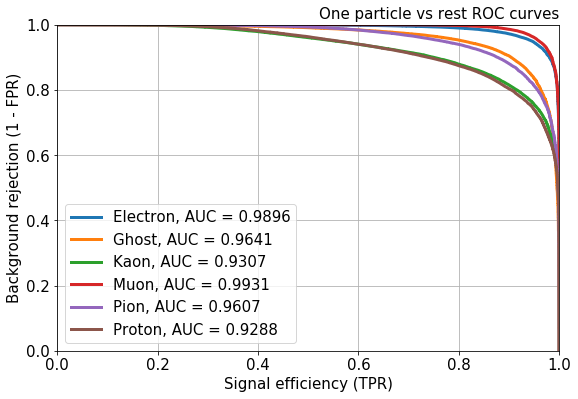

In [34]:
utils.plot_roc_curves(proba, validation_data.Class.values)

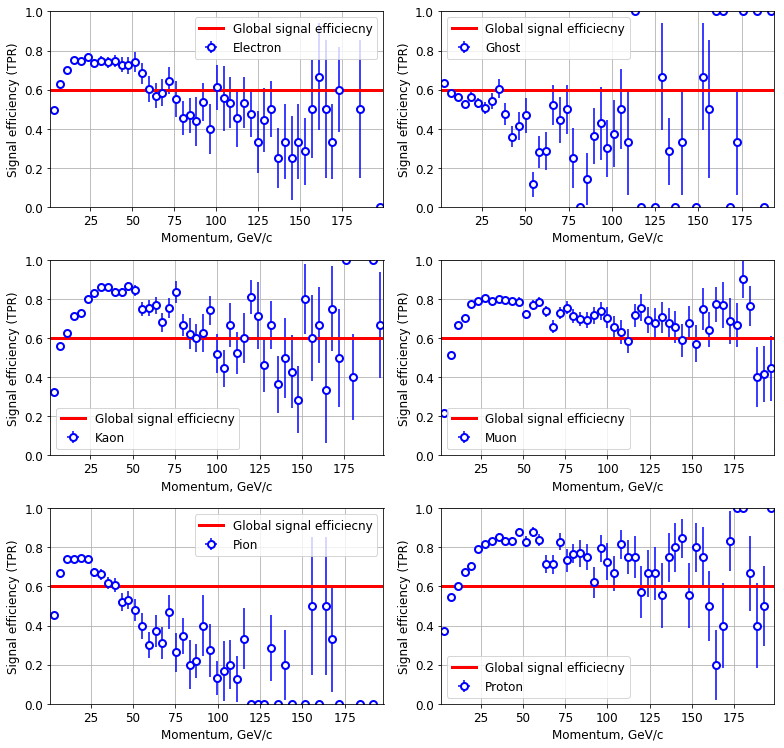

In [35]:
utils.plot_signal_efficiency_on_p(proba, validation_data.Class.values, validation_data.TrackP.values, 60, 50)
plt.show()

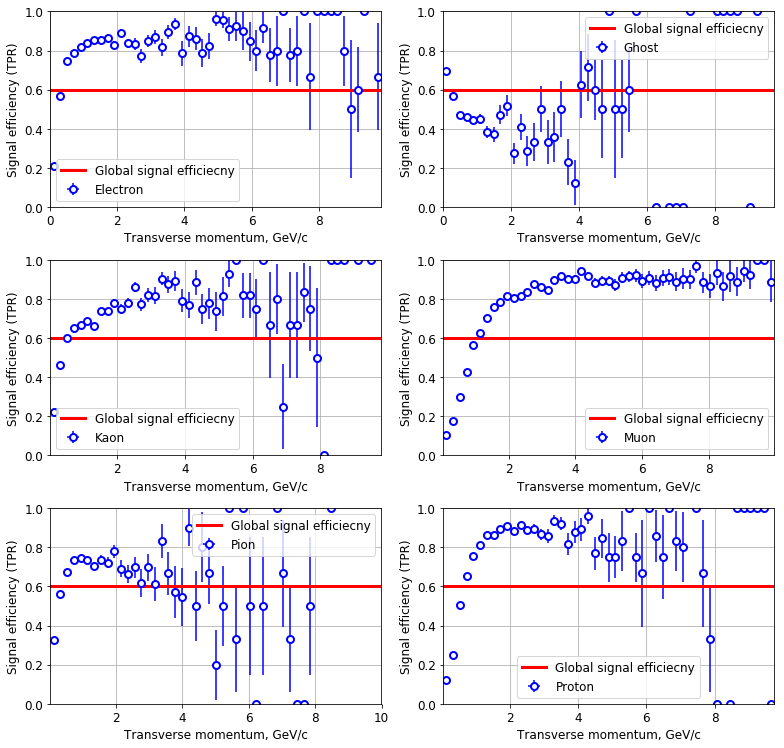

In [36]:
utils.plot_signal_efficiency_on_pt(proba, validation_data.Class.values, validation_data.TrackPt.values, 60, 50)
plt.show()

# Prepare submission

Select your best classifier and prepare submission file.

In [37]:
test = pd.read_csv('C://Users/user/Desktop/AML/course7/week2/test.csv')

In [38]:
best_model = nn

In [39]:
test_scale = scaler.transform(test[features])

In [40]:
# predict test sample
submit_proba = best_model.predict_proba(test_scale)
submit_ids = test.ID

In [41]:
from IPython.display import FileLink
utils.create_solution(submit_ids, submit_proba, filename='submission_file.csv.gz')

C:\Users\user\Downloads\Advanced-Machine-Learning-Specialization-master\Addressing Large Hadron Collider Challenges by Machine Learning\Week2\submission_file.csv.gz